In [1]:

import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Lire le fichier CSV
dataset = pd.read_csv(r"/Users/dimitriraymond/Documents/Epitech/Semestre 2/DAT/resultc/titre_positions3.csv")

# Définir la colonne "image" comme index
dataset = dataset.set_index("image")

# Créer les colonnes séparées
dataset['position'] = dataset['position'].str.strip('()')  # Supprimer les parenthèses
dataset[['x1', 'x2', 'y1', 'y2']] = dataset['position'].str.split(',', expand=True)  # Séparer les chiffres par des virgules

# Supprimer la colonne "position"
dataset = dataset.drop('position', axis=1)

# Afficher les premières lignes du DataFrame mis à jour
print(dataset.head())

# Convert categorical variable into integers 
X = dataset
leUnivers = LabelEncoder()

X["x1"] = leUnivers.fit_transform(X["x1"])
X["x2"] = leUnivers.fit_transform(X["x2"])
X["y2"] = leUnivers.fit_transform(X["y2"])
X["y1"] = leUnivers.fit_transform(X["y1"])

# Reste du code...




# Feature scalling
cols = X.columns
ms = MinMaxScaler()
ms.fit(X)
X = ms.transform(X)
X = pd.DataFrame(X, columns=[cols])
X.head()

# réduction de dimension
pca = PCA()
pca.fit(X)
df = pca.transform(X)

#Elbow Method for K means
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,20), timings=True)
visualizer.fit(df)
visualizer.show()

# Clustering
kmeans = KMeans(n_clusters=5) 

# result = kmeans.fit(X)
kmeansFit = kmeans.fit(df)
label = kmeansFit.predict(df)
print(label)

# Créer une nouvelle colonne dans le DataFrame pour stocker les labels de cluster
dataset['cluster'] = label

print("Terminé. Les informations de cluster ont été enregistrées dans", chemin_fichier_clusters)


                x1    x2    y1    y2
image                               
tt2321249.jpg    0     0   300   464
tt1477076.jpg    0     0   300   444
tt0089504.jpg   44   335   234    57
tt0089504.jpg    0     0   300   425
tt0086637.jpg  137   415   127    31


NameError: name 'MinMaxScaler' is not defined

In [2]:
# Import libraries we need

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from yellowbrick.cluster import KElbowVisualizer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans


In [3]:
# Lire le fichier CSV
dataset = pd.read_csv(r"/Users/dimitriraymond/Documents/Epitech/Semestre 2/DAT/resultc/titre_positions3.csv")

# Définir la colonne "image" comme index
dataset = dataset.set_index("image")


In [4]:
# Créer les colonnes séparées
dataset['position'] = dataset['position'].str.strip('()')  # Supprimer les parenthèses
dataset[['x1', 'x2', 'y1', 'y2']] = dataset['position'].str.split(',', expand=True)  # Séparer les chiffres par des virgules

# Supprimer la colonne "position"
dataset = dataset.drop('position', axis=1)

# Afficher les premières lignes du DataFrame mis à jour
print(dataset.head())

                x1    x2    y1    y2
image                               
tt2321249.jpg    0     0   300   464
tt1477076.jpg    0     0   300   444
tt0089504.jpg   44   335   234    57
tt0089504.jpg    0     0   300   425
tt0086637.jpg  137   415   127    31


In [5]:
# Convert categorical variable into integers 
X = dataset
leUnivers = LabelEncoder()

X["x1"] = leUnivers.fit_transform(X["x1"])
X["x2"] = leUnivers.fit_transform(X["x2"])
X["y2"] = leUnivers.fit_transform(X["y2"])
X["y1"] = leUnivers.fit_transform(X["y1"])

In [6]:
# Feature scalling
cols = X.columns
ms = MinMaxScaler()
ms.fit(X)
X = ms.transform(X)
X = pd.DataFrame(X, columns=[cols])
X.head()

# réduction de dimension
pca = PCA()
pca.fit(X)
df = pca.transform(X)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to '

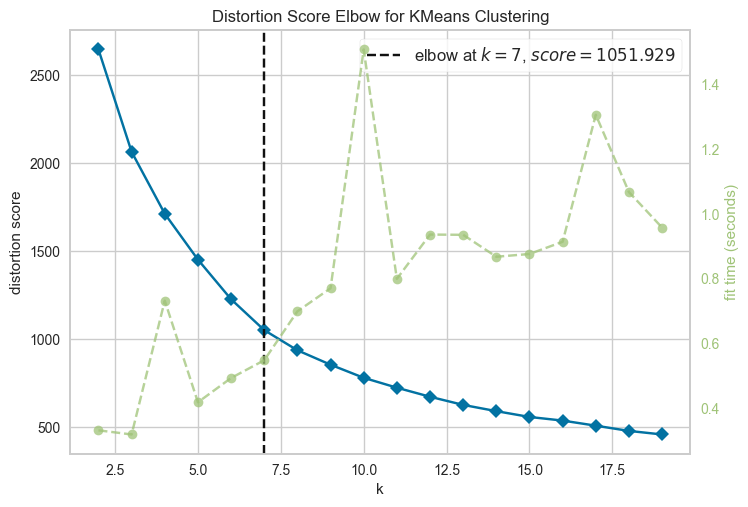

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [9]:
#Elbow Method for K means
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,20), timings=True)
visualizer.fit(df)
visualizer.show()



In [12]:
# Clustering
kmeans = KMeans(n_clusters=7) 

# result = kmeans.fit(X)
kmeansFit = kmeans.fit(df)
label = kmeansFit.predict(df)
print(label)


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[1 1 0 ... 1 1 1]


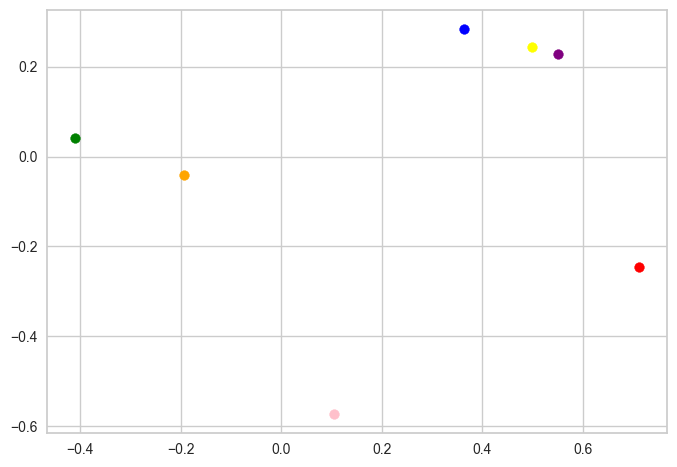

In [13]:
# display clusters center
cluster_center = kmeans.cluster_centers_

plt.scatter(cluster_center[0, 0], cluster_center[0, 1], color="red")
plt.scatter(cluster_center[1, 0], cluster_center[1, 1], color="green")
plt.scatter(cluster_center[2, 0], cluster_center[2, 1], color="blue")
plt.scatter(cluster_center[3, 0], cluster_center[3, 1], color="purple")
plt.scatter(cluster_center[4, 0], cluster_center[4, 1], color="pink")
plt.scatter(cluster_center[5, 0], cluster_center[5, 1], color="orange")
plt.scatter(cluster_center[6, 0], cluster_center[6, 1], color="yellow")
plt.show()

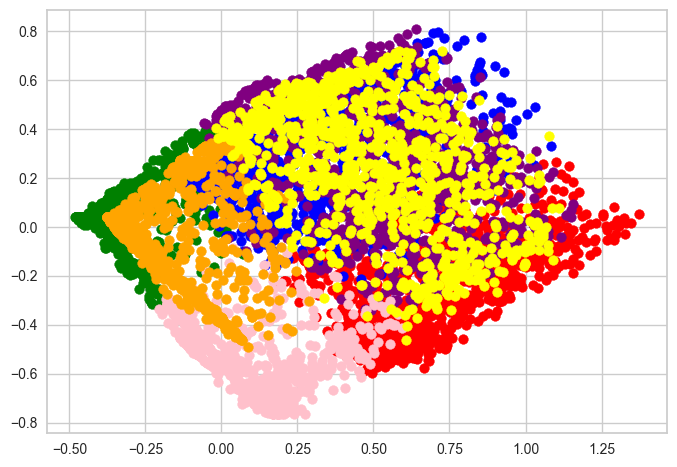

In [14]:
# Display clusters center
cluster_center = kmeans.cluster_centers_

# Définir une liste de couleurs pour les clusters
colors = ["red", "green", "blue", "purple", "pink", "orange", "yellow"]

# Parcourir chaque cluster
for i in range(len(cluster_center)):
    # Filtrer les données pour le cluster actuel
    filtered_data = df[label == i]
    
    # Afficher les points du cluster
    plt.scatter(filtered_data[:, 0], filtered_data[:, 1], color=colors[i])

plt.show()


In [ ]:
##Création du fichier CSV 

import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
import matplotlib.pyplot as plt

# Lire le fichier CSV
dataset = pd.read_csv(r"/Users/dimitriraymond/Documents/Epitech/Semestre 2/DAT/resultc/titre_positions3.csv")

# Définir la colonne "image" comme index
dataset = dataset.set_index("image")

# Créer les colonnes séparées
dataset['position'] = dataset['position'].str.strip('()')  # Supprimer les parenthèses
dataset[['x1', 'x2', 'y1', 'y2']] = dataset['position'].str.split(',', expand=True)  # Séparer les chiffres par des virgules

# Supprimer la colonne "position"
dataset = dataset.drop('position', axis=1)

# Convert categorical variable into integers 
X = dataset
leUnivers = LabelEncoder()

X["x1"] = leUnivers.fit_transform(X["x1"])
X["x2"] = leUnivers.fit_transform(X["x2"])
X["y2"] = leUnivers.fit_transform(X["y2"])
X["y1"] = leUnivers.fit_transform(X["y1"])

# Feature scaling
cols = X.columns
ms = MinMaxScaler()
ms.fit(X)
X = ms.transform(X)
X = pd.DataFrame(X, columns=[cols])

# Réduction de dimension
pca = PCA()
pca.fit(X)
df = pca.transform(X)

# Elbow Method for K means
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2, 20), timings=True)
visualizer.fit(df)
visualizer.show()

# Clustering
kmeans = KMeans(n_clusters=7)

kmeansFit = kmeans.fit(df)
label = kmeansFit.predict(df)

# Créer une nouvelle colonne dans le DataFrame pour stocker les labels de cluster
dataset['cluster'] = label

# Créer un DataFrame contenant le nom de la photo et le cluster
resultats_clusters = dataset[['cluster']].reset_index()

# Enregistrer les résultats dans un fichier CSV
chemin_fichier_resultats = r"/Users/dimitriraymond/Documents/Epitech/Semestre 2/DAT/resultc/resultats_clusters23.csv"
resultats_clusters.to_csv(chemin_fichier_resultats, index=False)

print("Terminé. Les informations de cluster ont été enregistrées dans", chemin_fichier_resultats)
